# COVID-19 Italy data visualization 

*This Jupyter notebooks is automatically taking data from the official github repo of the Italian authorities. Data is then elaborated and plotted to show some interesting figures.* 

In [0]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.dates as mdates

from bokeh.plotting import figure, output_file, show


Open the latest CSV file and show the data.


In [0]:
df= pd.read_csv('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv')
df['data'] = df['data'].apply(pd.to_datetime,infer_datetime_format=True)

**Daily percentage of death on positive**

Time evolution of the percentage of death on positive cases

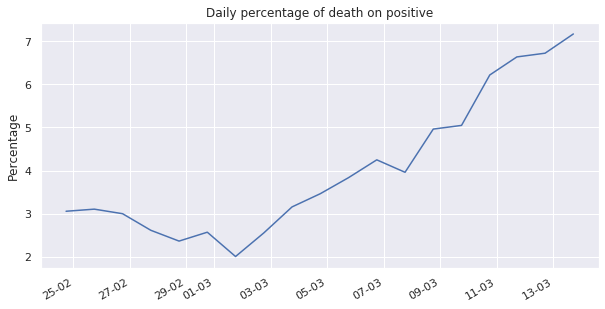

In [3]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df['data'], df['deceduti']/df['totale_casi']*100)
fig.autofmt_xdate()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
plt.ylabel('Percentage')
plt.title('Daily percentage of death on positive')
plt.show()

**Daily percentage of recovered on positive**

Time evolution of the percentage of recovered on positive cases

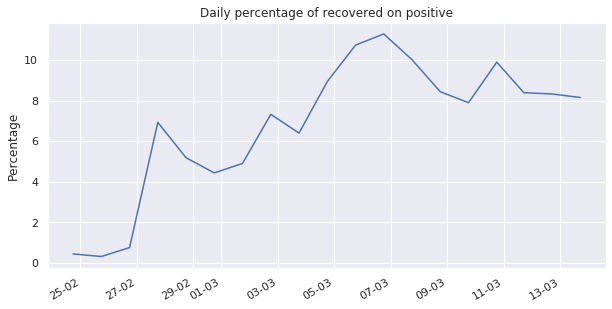

In [4]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df['data'], df['dimessi_guariti']/df['totale_casi']*100)
fig.autofmt_xdate()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
plt.ylabel('Percentage')
plt.title('Daily percentage of recovered on positive')
plt.show()

**Daily percentage of ICU on positive**

Time evolution of the percentage of patients in Intensive Care Units (ICUs) on positive cases

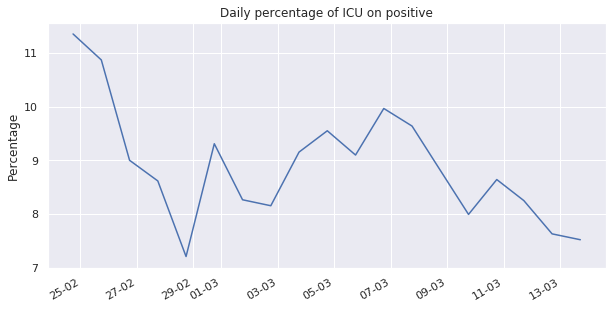

In [5]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df['data'], df['terapia_intensiva']/df['totale_casi']*100)
fig.autofmt_xdate()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
plt.ylabel('Percentage')
plt.title('Daily percentage of ICU on positive')
plt.show()

**Patients conditions**

Daily variation of the patients conditions.



findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


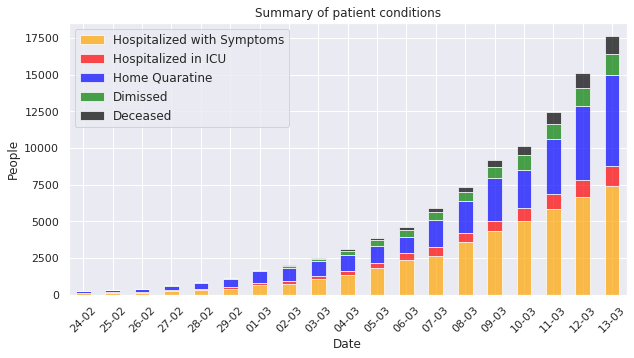

In [6]:
subdf=df[['ricoverati_con_sintomi','terapia_intensiva','isolamento_domiciliare','dimessi_guariti','deceduti']]
subdf.index = df['data'].dt.strftime('%d-%m')
subdf.columns = ['Hospitalized with Symptoms', \
                           'Hospitalized in ICU',\
                           'Home Quaratine',\
                           'Dimissed',\
                            "Deceased"]
ax = subdf.plot.bar(stacked=True,color=['orange', 'red', 'blue', 'green', 'black'], alpha =0.7, title = "Summary of patient conditions",figsize=(10,5))
ax.set_ylabel("People", fontname="Arial", fontsize=12)
ax.set_xlabel("Date", fontname="Arial", fontsize=12)
ax.legend(loc=2, prop={'size': 12})
plt.xticks(rotation=45);

**Positive cases**

Total number of positive cases

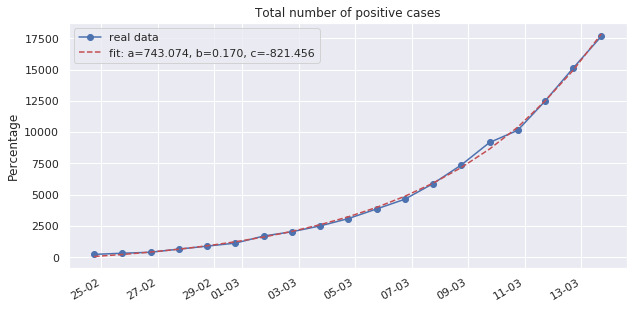

In [7]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df['data'], df['totale_casi'],'-o',label='real data')
fig.autofmt_xdate()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
plt.ylabel('Percentage')
plt.title('Total number of positive cases')


# Fitting with exponential
from scipy.optimize import curve_fit
def func(x, a, b, c):
  return a * np.exp(b * x) + c

popt, pcov = curve_fit(func, np.r_[1:np.size(df['totale_casi'])+1], df['totale_casi'])
popt
ax.plot(df['data'], func(np.r_[1:np.size(df['totale_casi'])+1], *popt), 'r--', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
ax.legend()
plt.show()



**Daily variation of the Growth Factor**

Growth factor is defined as:
\begin{equation}
G = \frac{\Delta N_{d}}{\Delta N_{d-1}}
\end{equation}
where $\Delta N_d$ is the number of new cases in day $d$.

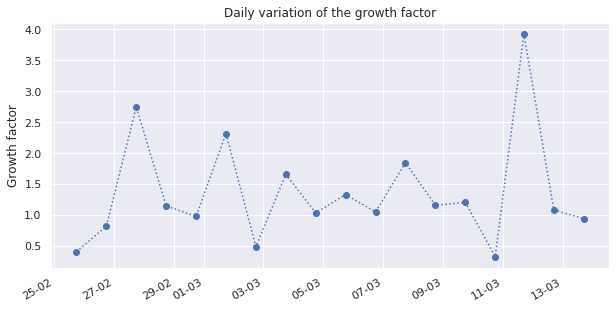

In [8]:
fig, ax = plt.subplots(figsize=(10,5))
gf=df.nuovi_attualmente_positivi[1:].to_numpy()/df.nuovi_attualmente_positivi[0:-1].to_numpy()
ax.plot(df.data[1:],gf,'o:')
fig.autofmt_xdate()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
plt.ylabel('Growth factor')
plt.title('Daily variation of the growth factor');